In [2]:
import matplotlib.pyplot as plt
import mplhep
# plt.style.use(mplhep.style.ATLAS)  # ATLAS/CMS/ALICE plot style
import numpy as np
import pandas as pd
import scipy.optimize as sc

In [3]:
# energy calibration
# get filepath of all calibration data
energy_path = 'Rotatable_Scintillator/'

Na_file1 = energy_path + 'Na_22_rot_1.TKA'
df_Na1 = pd.read_csv(Na_file1, header=None)
N_Na1 = np.array(df_Na1[0][2:])
t_Na1 = df_Na1[0][0]  # live time [s]

Na_file2 = energy_path + 'Na_22_rot_2.TKA'
df_Na2 = pd.read_csv(Na_file2, header=None)
N_Na2 = np.array(df_Na2[0][2:])
t_Na2 = df_Na2[0][0]  # live time [s]

Na_file3 = energy_path + 'Na_22_rot_3.TKA'
df_Na3 = pd.read_csv(Na_file3, header=None)
N_Na3 = np.array(df_Na3[0][2:])
t_Na3 = df_Na3[0][0]  # live time [s]

Co_file1 = energy_path + 'Co_60_rot_1.TKA'
df_Co1 = pd.read_csv(Co_file1, header=None)
N_Co1 = np.array(df_Co1[0][2:])
t_Co1 = df_Co1[0][0]  # live time [s]

Co_file2 = energy_path + 'Co_60_rot_2.TKA'
df_Co2 = pd.read_csv(Co_file2, header=None)
N_Co2 = np.array(df_Co2[0][2:])
t_Co2 = df_Co2[0][0]  # live time [s]

Co_file3 = energy_path + 'Co_60_rot_3.TKA'
df_Co3 = pd.read_csv(Co_file3, header=None)
N_Co3 = np.array(df_Co3[0][2:])
t_Co3 = df_Co3[0][0]  # live time [s]

Pd_file = energy_path + 'Pd_106_rot_1.TKA'
df_Pd = pd.read_csv(Pd_file, header=None)
N_Pd = np.array(df_Pd[0][2:])
t_Pd = df_Pd[0][0]  # live time [s]

under_file = energy_path + 'background_rot_1.TKA'
df_under = pd.read_csv(under_file, header=None)
N_under = np.array(df_under[0][2:])
t_under = df_under[0][0]  # live time [s]

print(t_under)
print(t_Co1)
print(t_Co2)
print(t_Co3)
print(t_Pd)

7001
1064
1000
1200
52414


In [4]:
def counting_rate(N, t):
    '''Calculate counting rate and uncertainty'''
    n = N / t
    u_n = np.sqrt(N) / t
    return n, u_n


def corrected_rate(N, t):
    '''Calculate counting rate corrected for underground with uncertainty'''
    n_raw, u_raw = counting_rate(N, t)
    n_under, u_under = counting_rate(N_under, t_under)

    n_corr = n_raw - n_under
    n_corr = np.where(n_corr>0, n_corr, 0)
    u_corr = np.sqrt(u_raw**2 + u_under**2)

    return n_corr, u_corr

In [5]:
n_Na1, u_Na1 = corrected_rate(N_Na1, t_Na1)
n_Na2, u_Na2 = corrected_rate(N_Na2, t_Na2)
n_Na3, u_Na3 = corrected_rate(N_Na3, t_Na3)

n_Na = [n_Na1, n_Na2, n_Na3]
u_Na = [u_Na1, u_Na2, u_Na3]

n_Co1, u_Co1 = corrected_rate(N_Co1, t_Co1)
n_Co2, u_Co2 = corrected_rate(N_Co2, t_Co2)
n_Co3, u_Co3 = corrected_rate(N_Co3, t_Co3)

n_Co = [n_Co1, n_Co2, n_Co3]
u_Co = [u_Co1, u_Co2, u_Co3]

n_Pd, u_Pd = corrected_rate(N_Pd, t_Pd)

n_under, u_under = counting_rate(N_under, t_under)

In [6]:
def gauss(x, A, mu, sigma, B):
    return A * np.exp(-(x-mu)**2 / (2*sigma**2)) + B

def linear_fct(x, m, c):
    return m * x + c

A1=2.510 +- 0.006
A2=0.295 +- 0.003
mu1=3096.5 +- 0.2
mu2=7494.2 +- 0.9
sigma1=108.4 +- 0.2
sigma2=181.2 +- 2.3
B1=0.120 +- 0.001
B2=0.022 +- 0.003
A1=2.469 +- 0.007
A2=0.297 +- 0.003
mu1=3086.1 +- 0.2
mu2=7472.4 +- 1.0
sigma1=108.8 +- 0.3
sigma2=181.6 +- 2.5
B1=0.115 +- 0.001
B2=0.020 +- 0.003
A1=2.555 +- 0.007
A2=0.291 +- 0.003
mu1=3086.6 +- 0.3
mu2=7469.8 +- 1.1
sigma1=108.4 +- 0.3
sigma2=176.0 +- 2.6
B1=0.117 +- 0.002
B2=0.029 +- 0.003


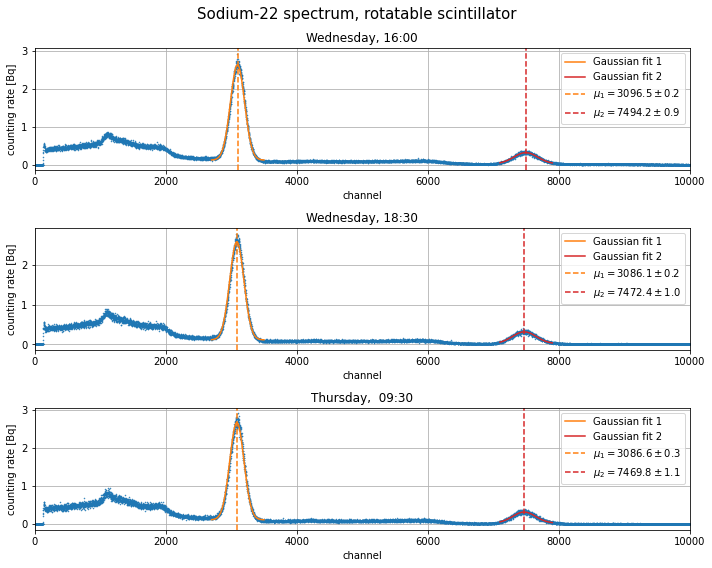

7471.069387281179 +- 0.7689807063797491


In [7]:
# Analysis of the sodium spectrum

channels = np.arange(1, len(N_Na1)+1, 1)

a = [[2700, 3500], [2700, 3500], [2700, 3500]]
b = [[7100, 7900], [7100, 7900], [7100, 7900]]

fig, ax = plt.subplots(3,1, figsize=(10,8))
coeffs_Na = np.zeros((6, 4))
cov_Na = np.zeros((6, 4, 4))

error_step = 100

for i in range(3):
    coeffs_Na[2*i], cov_Na[2*i] = sc.curve_fit(gauss, channels[a[i][0]:a[i][1]], n_Na[i][a[i][0]:a[i][1]],
                                   sigma = u_Na[i][a[i][0]:a[i][1]], absolute_sigma=True,
                                   p0=(2, 0.5*(a[i][0]+a[i][1]), 120, 150))
    coeffs_Na[2*i+1], cov_Na[2*i+1] = sc.curve_fit(gauss, channels[b[i][0]:b[i][1]], n_Na[i][b[i][0]:b[i][1]],
                                   sigma = u_Na[i][b[i][0]:b[i][1]], absolute_sigma=True,
                                   p0=(2, 0.5*(b[i][0]+b[i][1]), 120, 150))


    # print(coeffs_Na[2*i], np.sqrt(np.diagonal(cov_Na[2*i])))
    print('A1={:.3f} +- {:.3f}'.format(coeffs_Na[2*i][0], np.sqrt(cov_Na[2*i][0,0])))
    print('A2={:.3f} +- {:.3f}'.format(coeffs_Na[2*i+1][0], np.sqrt(cov_Na[2*i+1][0,0])))
    print('mu1={:.1f} +- {:.1f}'.format(coeffs_Na[2*i][1], np.sqrt(cov_Na[2*i][1,1])))
    print('mu2={:.1f} +- {:.1f}'.format(coeffs_Na[2*i+1][1], np.sqrt(cov_Na[2*i+1][1,1])))
    print('sigma1={:.1f} +- {:.1f}'.format(coeffs_Na[2*i][2], np.sqrt(cov_Na[2*i][2,2])))
    print('sigma2={:.1f} +- {:.1f}'.format(coeffs_Na[2*i+1][2], np.sqrt(cov_Na[2*i+1][2,2])))
    print('B1={:.3f} +- {:.3f}'.format(coeffs_Na[2*i][3], np.sqrt(cov_Na[2*i][3,3])))
    print('B2={:.3f} +- {:.3f}'.format(coeffs_Na[2*i+1][3], np.sqrt(cov_Na[2*i+1][3,3])))
    
    # print(coeffs_Na[2*i+1], np.sqrt(np.diagonal(cov_Na[2*i+1])))
    # ax[i].errorbar(channels[0:-1:error_step], n_Na1[0:-1:error_step],
    #             yerr=u_Na1[0:-1:error_step],
    #             fmt='none', c='black', zorder=10)

    ax[i].plot(channels, n_Na[i], lw=0, marker = '.', ms = 1)
    ax[i].plot(channels[a[i][0]:a[i][1]], gauss(channels[a[i][0]:a[i][1]], *coeffs_Na[2*i]),
               label = 'Gaussian fit 1', color = 'C1')
    ax[i].plot(channels[b[i][0]:b[i][1]], gauss(channels[b[i][0]:b[i][1]], *coeffs_Na[2*i+1]),
              label = 'Gaussian fit 2', color = 'C3')
    ax[i].axvline(coeffs_Na[2*i][1], ls = '--', color = 'C1', label = r'$\mu_1 = {:.1f} \pm {:.1f}$'.format(coeffs_Na[2*i][1], np.sqrt(cov_Na[2*i][1,1])))
    ax[i].axvline(coeffs_Na[2*i+1][1], ls = '--', color = 'C3', label = r'$\mu_2 = {:.1f} \pm {:.1f}$'.format(coeffs_Na[2*i+1][1], np.sqrt(cov_Na[2*i+1][1,1])))
    # ax[i].plot(channels, n_Na[i], lw=0, marker = '.', ms = 1)
    # ax[i].plot(channels[a[i][0]:a[i][1]], gauss(channels[a[i][0]:a[i][1]], *coeffs_Na[2*i]),
    #            label = r'$\mu$ = {:.0f}'.format(coeffs_Na[2*i][1]))
    # ax[i].plot(channels[b[i][0]:b[i][1]], gauss(channels[b[i][0]:b[i][1]], *coeffs_Na[2*i+1]),
    #           label = r'$\mu$ = {:.0f}'.format(coeffs_Na[2*i+1][1]))

    ax[i].set_xlabel('channel')
    ax[i].set_ylabel('counting rate [Bq]')

    ax[i].legend()
    ax[i].grid()

ax[0].set_xlim(0,10000)
ax[1].set_xlim(0,10000)
ax[2].set_xlim(0,10000)
ax[0].set_title('Wednesday, 16:00')
ax[1].set_title('Wednesday, 18:30')
ax[2].set_title('Thursday,  09:30')
plt.suptitle('Sodium-22 spectrum, rotatable scintillator', size=15)
plt.tight_layout()
# plt.savefig('Figures/Na22_rotatable.pdf', dpi=600)
plt.show()

print(np.mean([coeffs_Na[3][1], coeffs_Na[5][1]]), '+-', 1/2 * np.sqrt(cov_Na[3][1,1] + cov_Na[5][1,1]))

A1=\SI0.1113 +- 0.0008
A2=0.0974 +- 0.0007
mu1=6880.0 +- 1.1
mu2=7799.1 +- 1.1
sigma1=162 +- 2
sigma2=191 +- 2
B1=0.0280 +- 0.0006
B2=0.0076 +- 0.0006
A1=\SI0.1184 +- 0.0009
A2=0.1013 +- 0.0007
mu1=6864.6 +- 1.0
mu2=7782.7 +- 1.1
sigma1=163 +- 2
sigma2=191 +- 2
B1=0.0269 +- 0.0007
B2=0.0082 +- 0.0006
A1=\SI0.1157 +- 0.0008
A2=0.1011 +- 0.0007
mu1=6860.1 +- 1.0
mu2=7780.3 +- 1.0
sigma1=168 +- 2
sigma2=192 +- 2
B1=0.0254 +- 0.0007
B2=0.0071 +- 0.0005


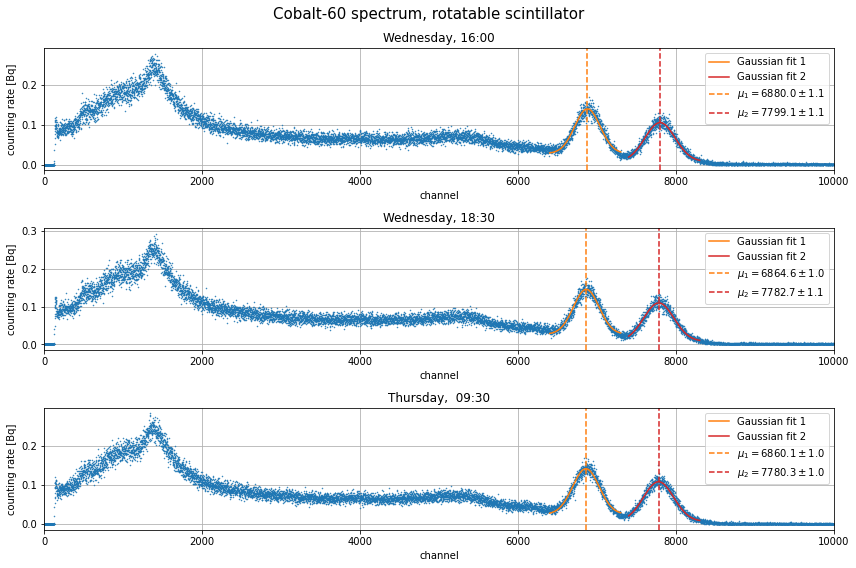

6862.320246465337 +- 0.7139453478027159


In [8]:
# Analysis of the cobalt spectrum

channels = np.arange(1, len(N_Co1)+1, 1)

a = [[6400, 7300], [6400, 7300], [6400, 7300]]
b = [[7400, 8300], [7400, 8300], [7400, 8300]]

fig, ax = plt.subplots(3,1, figsize=(12,8))
coeffs_Co = np.zeros((6, 4))
cov_Co = np.zeros((6, 4, 4))

error_step = 100

for i in range(3):
    coeffs_Co[2*i], cov_Co[2*i] = sc.curve_fit(gauss, channels[a[i][0]:a[i][1]], n_Co[i][a[i][0]:a[i][1]],
                                   sigma = u_Co[i][a[i][0]:a[i][1]], absolute_sigma=True,
                                   p0=(2, 0.5*(a[i][0]+a[i][1]), 120, 150))
    coeffs_Co[2*i+1], cov_Co[2*i+1] = sc.curve_fit(gauss, channels[b[i][0]:b[i][1]], n_Co[i][b[i][0]:b[i][1]],
                                   sigma = u_Co[i][b[i][0]:b[i][1]], absolute_sigma=True,
                                   p0=(2, 0.5*(b[i][0]+b[i][1]), 120, 150))


    # print(coeffs_Co[2*i], np.sqrt(np.diagonal(cov_Co[2*i])))
    # print(coeffs_Co[2*i+1], np.sqrt(np.diagonal(cov_Co[2*i+1])))
    print('A1=\SI{:.4f} +- {:.4f}'.format(coeffs_Co[2*i][0], np.sqrt(cov_Co[2*i][0,0])))
    print('A2={:.4f} +- {:.4f}'.format(coeffs_Co[2*i+1][0], np.sqrt(cov_Co[2*i+1][0,0])))
    print('mu1={:.1f} +- {:.1f}'.format(coeffs_Co[2*i][1], np.sqrt(cov_Co[2*i][1,1])))
    print('mu2={:.1f} +- {:.1f}'.format(coeffs_Co[2*i+1][1], np.sqrt(cov_Co[2*i+1][1,1])))
    print('sigma1={:.0f} +- {:.0f}'.format(coeffs_Co[2*i][2], np.sqrt(cov_Co[2*i][2,2])))
    print('sigma2={:.0f} +- {:.0f}'.format(coeffs_Co[2*i+1][2], np.sqrt(cov_Co[2*i+1][2,2])))
    print('B1={:.4f} +- {:.4f}'.format(coeffs_Co[2*i][3], np.sqrt(cov_Co[2*i][3,3])))
    print('B2={:.4f} +- {:.4f}'.format(coeffs_Co[2*i+1][3], np.sqrt(cov_Co[2*i+1][3,3])))
    # ax[i].errorbar(channels[0:-1:error_step], n_Co1[0:-1:error_step],
    #             yerr=u_Co1[0:-1:error_step],
    #             fmt='none', c='black', zorder=10)

    ax[i].plot(channels, n_Co[i], lw=0, marker = '.', ms = 1)
    ax[i].plot(channels[a[i][0]:a[i][1]], gauss(channels[a[i][0]:a[i][1]], *coeffs_Co[2*i]),
               label = r'Gaussian fit 1', color='C1')
    ax[i].plot(channels[b[i][0]:b[i][1]], gauss(channels[b[i][0]:b[i][1]], *coeffs_Co[2*i+1]),
              label = r'Gaussian fit 2', color='C3')
    ax[i].axvline(coeffs_Co[2*i][1], ls = '--', color = 'C1', label = r'$\mu_1 = {:.1f} \pm {:.1f}$'.format(coeffs_Co[2*i][1], np.sqrt(cov_Co[2*i][1,1])))
    ax[i].axvline(coeffs_Co[2*i+1][1], ls = '--', color = 'C3', label = r'$\mu_2 = {:.1f} \pm {:.1f}$'.format(coeffs_Co[2*i+1][1], np.sqrt(cov_Co[2*i+1][1,1])))
    # ax[i].axvline(channels[a[i][0]], ls = '--')
    # ax[i].axvline(channels[a[i][1]], ls = '--')
    # ax[i].axvline(channels[b[i][0]], ls = '--')
    # ax[i].axvline(channels[b[i][1]], ls = '--')

    ax[i].set_xlabel('channel')
    ax[i].set_ylabel('counting rate [Bq]')
    ax[i].set_xlim(0,10000)

    ax[i].legend()
    ax[i].grid()

ax[0].set_title('Wednesday, 16:00')
ax[1].set_title('Wednesday, 18:30')
ax[2].set_title('Thursday,  09:30')
plt.suptitle('Cobalt-60 spectrum, rotatable scintillator', size=15)
plt.tight_layout()
# plt.savefig('Figures/Co60_rotatable.pdf', dpi=600)
plt.show()

print(np.mean([coeffs_Co[2][1], coeffs_Co[4][1]]), '+-', 1/2 * np.sqrt(cov_Co[2][1,1] + cov_Co[4][1,1]))

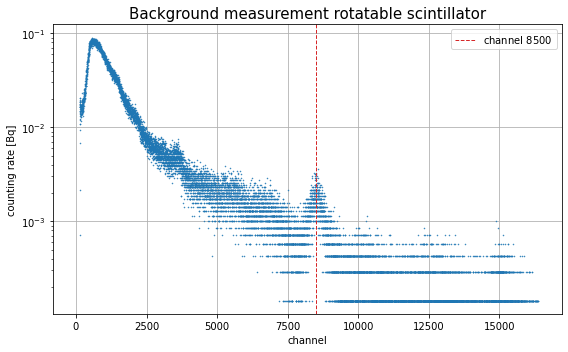

In [9]:
fig, ax = plt.subplots(figsize = (8,5))
a = 8000
b = 9000
ax.plot(channels, n_under, lw = 0, marker = '.', ms = 1)
# ax.axvline(channels[a])
# ax.axvline(channels[b])
# params, cov = sc.curve_fit(gauss, channels[a:b+1], n_under[a:b+1], sigma = u_under[a:b+1], absolute_sigma=True, p0=[3e-3, 8500, 100, 1])
# print(params)
ax.axvline(8500, ls='--', lw=1, color='C3', label=r'channel $8500$')
# plt.plot(channels[a:b], gauss(channels[a:b], *params))
ax.grid()
ax.set_yscale('log')
ax.set_title('Background measurement rotatable scintillator', size=15)
ax.set_xlabel('channel')
ax.set_ylabel('counting rate [Bq]')
ax.legend()
plt.tight_layout()
# plt.savefig('Figures/background_rotatable.pdf', dpi=600)
plt.show()

In [10]:
print(t_Na1, t_Na2, t_Na3)
print(t_Co1, t_Co2, t_Co3)

500 360 300
1064 1000 1200


In [11]:
energies = np.array([511, 1274.58, 1173.24, 1332.51])
ch_num = np.array([np.mean([coeffs_Na[2,1], coeffs_Na[4,1]]),
                   np.mean([coeffs_Na[3,1], coeffs_Na[5,1]]),
                   np.mean([coeffs_Co[2,1], coeffs_Co[4,1]]),
                   np.mean([coeffs_Co[3,1], coeffs_Co[5,1]])])
print(ch_num)

[3086.30629927 7471.06938728 6862.32024647 7781.48972721]


[  0.17473227 -28.03260566] +- [6.92824460e-04 4.55614793e+00]


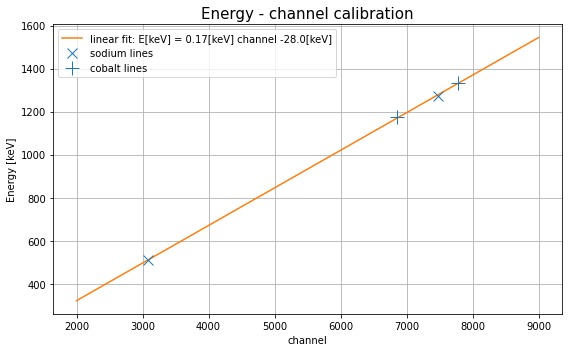

In [12]:
coeffs_lin, cov_lin = sc.curve_fit(linear_fct, ch_num, energies)
print(coeffs_lin, '+-', np.sqrt(np.diag(cov_lin)))
ch_axis = np.linspace(2000, 9000, 1001)

fig, ax = plt.subplots(figsize=(8,5))

ax.plot(ch_axis, linear_fct(ch_axis, *coeffs_lin), c='C1', label= r'linear fit: E[keV] = {:.2f}[keV] channel {:.1f}[keV]'.format(*coeffs_lin))
ax.plot(ch_num[:2], energies[:2], marker = 'x', ms=10, lw = 0, label = 'sodium lines', c='C0')
ax.plot(ch_num[2:], energies[2:], marker = '+', ms=14, lw = 0, label = 'cobalt lines', c='C0')

ax.set_title('Energy - channel calibration', size=15)
ax.set_ylabel('Energy [keV]')
ax.set_xlabel('channel')
ax.legend()
ax.grid()
plt.tight_layout()
plt.savefig('Figures/calibration_fit.pdf', dpi=600)
plt.show()

In [13]:
def E(x):
    return coeffs_lin[0]*x + coeffs_lin[1]
def uE(x, dx):
    return np.sqrt((x*np.sqrt(cov_lin[0,0]))**2 + cov_lin[1,1] + (coeffs_lin[0] * dx)**2)

In [14]:
print(t_Pd / 60 / 60)

14.559444444444445


In [15]:
x = 8500
u_x = 5
print(cov_lin)
a, b = coeffs_lin[0], coeffs_lin[1]
u_a, u_b = np.sqrt(cov_lin[0,0]), np.sqrt(cov_lin[1,1])
u_ab = cov_lin[0,1]
print('E = ',(x - b) / a)

u_E = np.sqrt((u_x/a)**2 + (u_b/a)**2 + ((x-b)/a**2 * u_a)**2 + 2 * (-1)/a * ((x-b)/a**2) * u_ab)

print((u_x/a)**2)
print((u_b/a)**2)
print(((x-b)/a**2 * u_a)**2)
print()

print('u_E =', u_E)

[[ 4.80005732e-07 -3.02417918e-03]
 [-3.02417918e-03  2.07584839e+01]]
E =  48806.282421189724
818.8300299930787
679.9068005024786
37449.98376268506

u_E = 220.49352907046466


In [16]:
def energy(channel):
    m, c = coeffs_lin
    return (channel - c) / m


def u_energy(channel, u_channel=1):
    m, c = coeffs_lin
    u_m, u_c = np.sqrt(np.diagonal(cov_lin))
    return np.sqrt((u_channel/m)**2 + (u_c/m)**2 + (u_m*(channel-c)/m**2)**2)

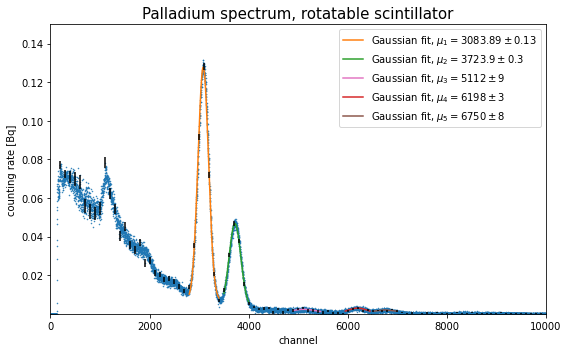

[ 1.20000e-01  3.08389e+03 -1.05800e+02  1.00000e-02] [1.69274627e-04 1.29288054e-01 2.06843723e-01 1.26273188e-04]
[4.35628751e-02 3.72391290e+03 1.18109739e+02 3.24302079e-03] [2.06398784e-04 2.92276153e-01 7.50789806e-01 2.23648867e-04]
[1.74177475e-03 5.11194117e+03 2.32057226e+02 6.03290721e-04] [6.73394302e-04 8.58257398e+00 6.71856938e+01 6.93712791e-04]
[ 3.01614149e-03  6.19810387e+03  2.08696185e+02 -6.28303761e-05] [1.17092077e-03 3.31771014e+00 5.53176929e+01 1.19414297e-03]
[7.35748289e-04 6.75020947e+03 1.18110821e+02 1.26787951e-03] [1.48327981e-04 7.72723303e+00 2.70891481e+01 1.61541786e-04]
510.8219045764641 and 5.032297676423179
622.6551552143844 5.236180349791923
865.1884884855835 5.962459575693497
1054.9761649599861 6.287661327881948
1151.4468306922417 6.667318380598689


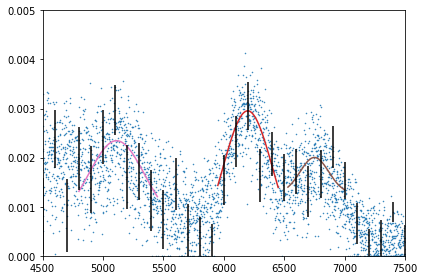

In [17]:
# Analysis of the Palladium spectrum
channels = np.arange(1, len(N_Pd)+1, 1)
a1, b1 = 2800, 3400
a2, b2 = 3500, 4000
a3, b3 = 4900, 5450
a4, b4 = 5950, 6450
a5, b5 = 6530, 7000

coeffs_Pd1, cov_Pd1 = sc.curve_fit(gauss, channels[a1:b1], n_Pd[a1:b1],
                                   sigma=u_Pd[a1:b1], absolute_sigma=True,
                                   p0=(0.2, 0.5*(a1+b1), 200, 15))
coeffs_Pd2, cov_Pd2 = sc.curve_fit(gauss, channels[a2:b2], n_Pd[a2:b2],
                                   sigma=u_Pd[a2:b2], absolute_sigma=True,
                                   p0=(0.2, 0.5*(a2+b2), 200, 20))
coeffs_Pd3, cov_Pd3 = sc.curve_fit(gauss, channels[a3:b3], n_Pd[a3:b3],
                                   sigma=u_Pd[a3:b3], absolute_sigma=True,
                                   p0=(0.2, 0.5*(a3+b3), 200, 20))
coeffs_Pd4, cov_Pd4 = sc.curve_fit(gauss, channels[a4:b4], n_Pd[a4:b4],
                                   sigma=u_Pd[a4:b4], absolute_sigma=True,
                                   p0=(0.002, 0.5*(a4+b4), 200, 0.001))
coeffs_Pd5, cov_Pd5 = sc.curve_fit(gauss, channels[a5:b5], n_Pd[a5:b5],
                                   sigma=u_Pd[a5:b5], absolute_sigma=True,
                                   p0=(0.002, 0.5*(a5+b5), 200, 0.001))

fig, ax = plt.subplots(figsize=(8,5))

error_step = 100
ax.errorbar(channels[0:-1:error_step], n_Pd[0:-1:error_step],
            yerr=u_Pd[0:-1:error_step],
            fmt='none', c='black', zorder=10)

ax.plot(channels, n_Pd, lw=0, marker = '.', ms = 1)
ax.plot(channels[a1:b1], gauss(channels[a1:b1], *coeffs_Pd1), label=r'Gaussian fit, $\mu_1 ={:.2f} \pm {:.2f}$'.format(coeffs_Pd1[1], np.sqrt(cov_Pd1[1,1])), c='C1')
ax.plot(channels[a2:b2], gauss(channels[a2:b2], *coeffs_Pd2), label=r'Gaussian fit, $\mu_2 ={:.1f} \pm {:.1f}$'.format(coeffs_Pd2[1], np.sqrt(cov_Pd2[1,1])), c='C2')
ax.plot(channels[a3:b3], gauss(channels[a3:b3], *coeffs_Pd3), label=r'Gaussian fit, $\mu_3 ={:.0f} \pm {:.0f}$'.format(coeffs_Pd3[1], np.sqrt(cov_Pd3[1,1])), c='C6')
ax.plot(channels[a4:b4], gauss(channels[a4:b4], *coeffs_Pd4), label=r'Gaussian fit, $\mu_4 ={:.0f} \pm {:.0f}$'.format(coeffs_Pd4[1], np.sqrt(cov_Pd4[1,1])), c='C3')
ax.plot(channels[a5:b5], gauss(channels[a5:b5], *coeffs_Pd5), label=r'Gaussian fit, $\mu_5 ={:.0f} \pm {:.0f}$'.format(coeffs_Pd5[1], np.sqrt(cov_Pd5[1,1])), c='C5')
# ax.axvline(channels[a1], ls = '--')
# ax.axvline(channels[b1], ls = '--')
# ax.axvline(channels[a2], ls = '--')
# ax.axvline(channels[b2], ls = '--')
# ax.axvline(channels[a3], ls = '--')
# ax.axvline(channels[b3], ls = '--')
# ax.axvline(channels[a4], ls = '--')
# ax.axvline(channels[b4], ls = '--')

ax.set_ylim((.5/t_Pd, 0.15))
# ax.set_yscale('log')
ax.legend()
ax.set_xlim(0,10000)
ax.set_title('Palladium spectrum, rotatable scintillator', size=15)
ax.set_xlabel('channel')
ax.set_ylabel('counting rate [Bq]')
plt.tight_layout()
# plt.savefig('Figures/Pd_spectrum_rot.pdf', dpi=800)
plt.show()
print(np.round(coeffs_Pd1,2), np.sqrt(np.diagonal(cov_Pd1)))
print(coeffs_Pd2, np.sqrt(np.diagonal(cov_Pd2)))
print(coeffs_Pd3, np.sqrt(np.diagonal(cov_Pd3)))
print(coeffs_Pd4, np.sqrt(np.diagonal(cov_Pd4)))
print(coeffs_Pd5, np.sqrt(np.diagonal(cov_Pd5)))

print(E(coeffs_Pd1[1]),'and', uE(coeffs_Pd1[1], np.sqrt(cov_Pd1[1,1])))
print(E(coeffs_Pd2[1]), uE(coeffs_Pd2[1], np.sqrt(cov_Pd2[1,1])))
print(E(coeffs_Pd3[1]), uE(coeffs_Pd3[1], np.sqrt(cov_Pd3[1,1])))
print(E(coeffs_Pd4[1]), uE(coeffs_Pd4[1], np.sqrt(cov_Pd4[1,1])))
print(E(coeffs_Pd5[1]), uE(coeffs_Pd5[1], np.sqrt(cov_Pd5[1,1])))


fig, ax = plt.subplots()
ax.errorbar(channels[0:-1:error_step], n_Pd[0:-1:error_step],
            yerr=u_Pd[0:-1:error_step],
            fmt='none', c='black', zorder=10)
ax.plot(channels, n_Pd, lw=0, marker = '.', ms = 1)
ax.plot(channels[a3-100:b3], gauss(channels[a3-100:b3], *coeffs_Pd3), label=r'Gaussian fit, $\mu_3 ={:.0f}$'.format(coeffs_Pd3[1]), c='C6')
ax.plot(channels[a4:b4], gauss(channels[a4:b4], *coeffs_Pd4), label=r'Gaussian fit, $\mu_4 ={:.0f}$'.format(coeffs_Pd4[1]), c='C3')
ax.plot(channels[a5:b5], gauss(channels[a5:b5], *coeffs_Pd5), label=r'Gaussian fit, $\mu_5 ={:.0f}$'.format(coeffs_Pd5[1]), c='C5')
# ax.axvline(channels[a3], ls='--')
# ax.axvline(channels[b3], ls='--')
ax.set_xlim(4500, 7500)
ax.set_ylim(0,0.005)
plt.tight_layout()
plt.savefig('Figures/Pd_spectrum_rot_zoom.pdf', dpi=600)
plt.show()

In [18]:
print(E(coeffs_Pd1[1]), '+-', uE(coeffs_Pd1[1], np.sqrt(cov_Pd1[1,1])), 'keV')
print(E(coeffs_Pd2[1]), '+-', uE(coeffs_Pd2[1], np.sqrt(cov_Pd2[1,1])), 'keV')
print(E(coeffs_Pd3[1]), '+-', uE(coeffs_Pd3[1], np.sqrt(cov_Pd3[1,1])), 'keV')
print(E(coeffs_Pd4[1]), '+-', uE(coeffs_Pd4[1], np.sqrt(cov_Pd4[1,1])), 'keV')
print(E(coeffs_Pd5[1]), '+-', uE(coeffs_Pd5[1], np.sqrt(cov_Pd5[1,1])), 'keV')

510.8219045764641 +- 5.032297676423179 keV
622.6551552143844 +- 5.236180349791923 keV
865.1884884855835 +- 5.962459575693497 keV
1054.9761649599861 +- 6.287661327881948 keV
1151.4468306922417 +- 6.667318380598689 keV


In [27]:
b = E(coeffs_Pd1[1])
u_b = uE(coeffs_Pd1[1], np.sqrt(cov_Pd1[1,1]))

c = b + E(coeffs_Pd2[1])
u_c = np.sqrt((u_b)**2 + (uE(coeffs_Pd2[1], np.sqrt(cov_Pd2[1,1])))**2)

d = b + E(coeffs_Pd4[1])
u_d = np.sqrt((u_b)**2 + (uE(coeffs_Pd4[1], np.sqrt(cov_Pd4[1,1])))**2)

e = c + E(coeffs_Pd3[1])
u_e = np.sqrt(u_c**2 + ()**2)

print(b, '+-', u_b)
print(c, '+-', u_c)
print(d, '+-', u_d)
print(e, '+-', u_e)

510.8219045764641 +- 5.032297676423179
1133.4770597908484 +- 7.2623415342216715
1565.7980695364502 +- 8.053490229600847


In [0]:
### Source for Pd Term sceme:
# Abb.2.11 on p. 38
# http://iktp.tu-dresden.de/IKTP/pub/09/Marcel_Heine_-_Eine_Suche_nach_Doppelbeta-Zerfaellen_von_Cadmium-_%20Zink_und%20Tellur-_Isotopen_mit_Positronen-Emission.pdf

# both lines identified! Nice!!

In [24]:
def double_gauss(x, A1, mu1, sigma1, A2, mu2, sigma2, B):
    return gauss(x, A1, mu1, sigma1, 0) + gauss(x, A2, mu2, sigma2, 0) + B

[2.42193534e-03 6.18823488e+03 1.76582215e+02 1.46208451e-03
 6.76830644e+03 1.73549724e+02 5.25769075e-04]
1053.2517339482135 +- 6.297173959840133 keV
1154.6089556599638 +- 6.632167298741807 keV


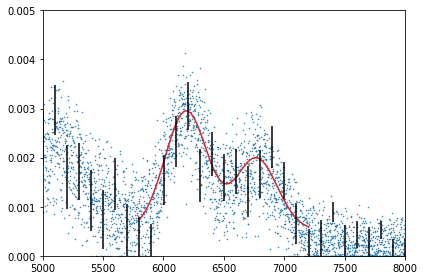

In [36]:
a3, b4 = 5800, 7200

double_coeffs, double_cov = sc.curve_fit(double_gauss, channels[a3:b4], n_Pd[a3:b4],
                                         sigma=u_Pd[a3:b4], absolute_sigma=True,
                                         p0=(0.002, 0.5*(a3+b3), 200, 0.002, 0.5*(a4+b4), 200, 0.001))

print(double_coeffs)
#print(np.sqrt(np.diagonal(double_cov)))

print(E(double_coeffs[1]), '+-', uE(double_coeffs[1], np.sqrt(double_cov[1,1])), 'keV')
print(E(double_coeffs[4]), '+-', uE(double_coeffs[4], np.sqrt(double_cov[4,4])), 'keV')

fig, ax = plt.subplots()
ax.errorbar(channels[0:-1:error_step], n_Pd[0:-1:error_step],
            yerr=u_Pd[0:-1:error_step],
            fmt='none', c='black', zorder=10)
ax.plot(channels, n_Pd, lw=0, marker = '.', ms = 1)
ax.plot(channels[a3:b4], double_gauss(channels[a3:b4], *double_coeffs), label=r'Double Gaussian fit', c='C3')
ax.set_xlim(5000, 8000)
ax.set_ylim(0,0.005)
plt.tight_layout()
# plt.savefig('Figures/Pd_spectrum_rot_zoom.pdf', dpi=600)
plt.show()